In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, norm
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

In [9]:
df = pd.read_csv('source/FReDA3.csv')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Couple Agreement'),
  Text(1, 0, 'One-sided Deprivation'),
  Text(2, 0, 'One-sided Saturation'),
  Text(3, 0, 'Couple Deprivation'),
  Text(4, 0, 'Couple Saturation'),
  Text(5, 0, 'Couple Disagreement')])

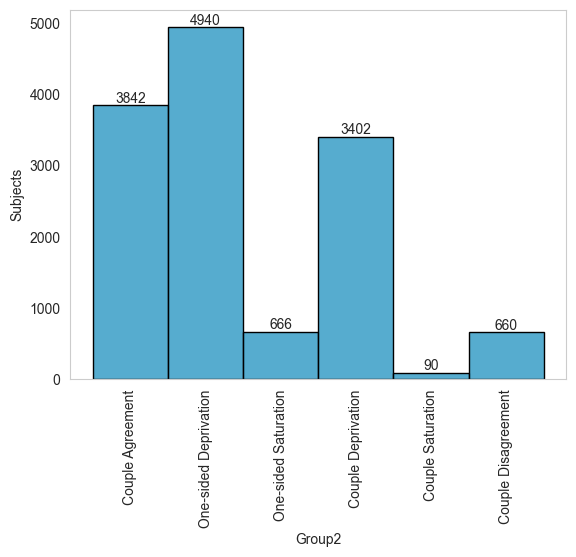

In [7]:
df['SubGroup'] = pd.Categorical(
    df['SubGroup'], ['Couple Agreement',
                     'One-sided Deprivation',
                     'One-sided Saturation',
                     'Couple Deprivation',
                     'Couple Saturation',
                     'Couple Disagreement']
)
ax = sns.histplot(data=df, x='SubGroup',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Subjects")
plt.xticks(rotation=90, )
#plt.savefig('output/img_bg/subgroup_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

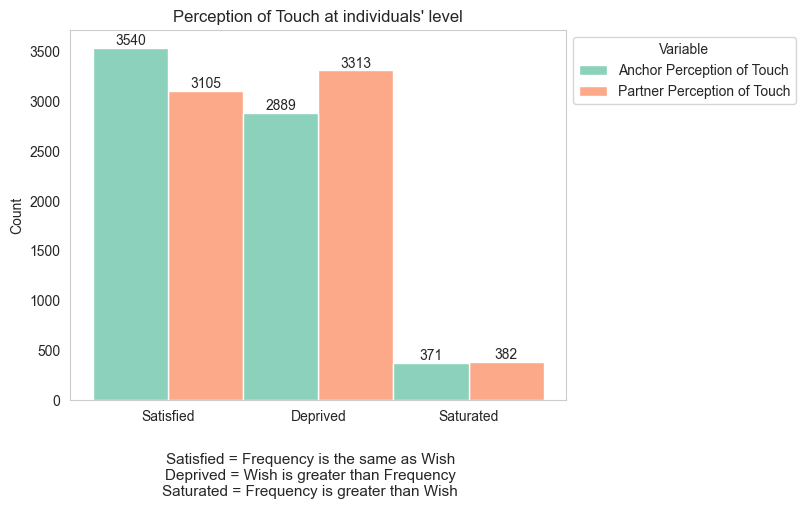

In [11]:
df2 = df.melt(
    value_vars=["Anchor Perception of Touch", "Partner Perception of Touch"],
    var_name="Variable",
    value_name="Value"
)
ax = sns.histplot(
    data=df2,
    x="Value",
    hue="Variable",
    bins=15,
    multiple="dodge",
    palette=sns.color_palette("Set2", 2),
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.xlabel("")
plt.title("Perception of Touch at individuals' level")
plt.suptitle("Satisfied = Frequency is the same as Wish"
             "\nDeprived = Wish is greater than Frequency"
             "\nSaturated = Frequency is greater than Wish",
             fontsize=11,
             y=-0
             )
plt.savefig('output/img_bg/groups/new_histo_couple_members.png', dpi=600, transparent=False, bbox_inches='tight')
plt.show()

In [5]:
subgroup_agreement = df[df['SubGroup'] == 'Couple Agreement']
subgroup_one_sided_deprivation = df[df['SubGroup'] == 'One-sided Deprivation']
subgroup_one_sided_saturation = df[df['SubGroup'] == 'One-sided Saturation']
subgroup_deprivation = df[df['SubGroup'] == 'Couple Deprivation']
subgroup_saturation = df[df['SubGroup'] == 'Couple Saturation']
subgroup_diagreement = df[df['SubGroup'] == 'Couple Disagreement']

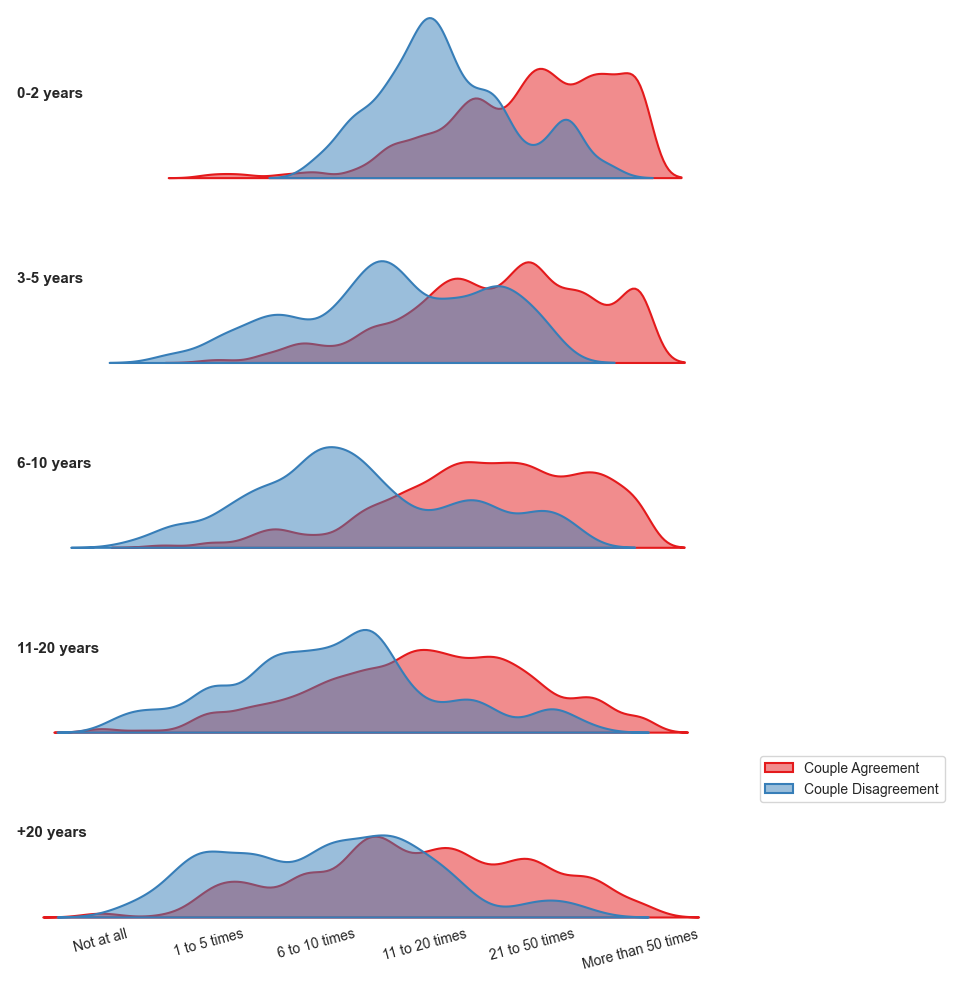

In [6]:
temp1 = 'Relationship Length'
df2 = df[
    (df['SubGroup'] != 'One-sided Deprivation') &
    (df['SubGroup'] != 'One-sided Saturation') &
    (df['SubGroup'] != 'Couple Saturation') &
    (df['SubGroup'] != 'Couple Deprivation')
    ]
g = sns.FacetGrid(
    data=df2, row=temp1, hue="SubGroup",
    aspect=4, height=2, palette=sns.color_palette("Set1", 2)
)
g.map(
    sns.kdeplot, "Couple Frequency of Touch", bw_adjust=0.5,
    clip_on=False, fill=True, alpha=0.5,
    linewidth=1.5
)
g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
g.set_xlabels("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for i, ax in enumerate(g.axes.flatten()):
    labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "+20 years"]
    ax.text(
        0.01, 0.5, labels[i], transform=ax.transAxes,
        fontweight="bold", fontsize=11, ha="left", va="center"
    )
    ax.grid(False)

plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all", '1 to 5 times',
        '6 to 10 times', '11 to 20 times',
        '21 to 50 times', 'More than 50 times',
    ],
    rotation=15
)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

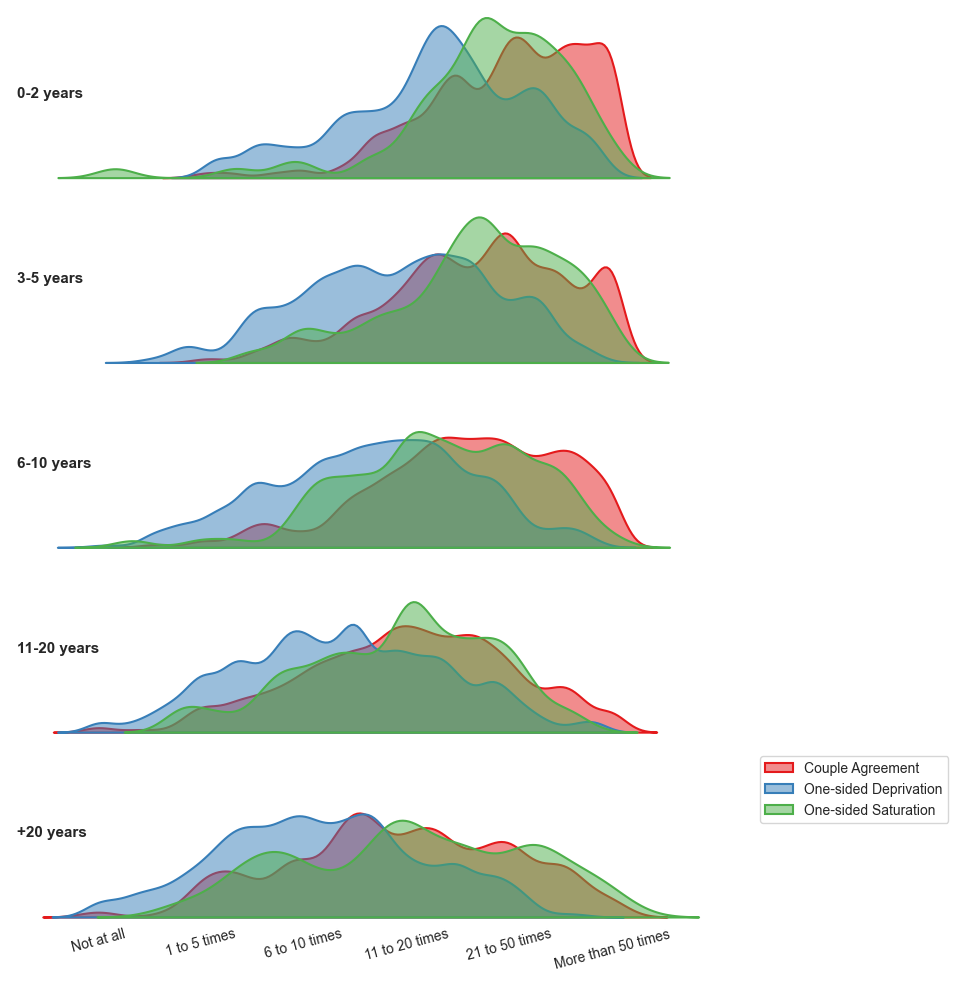

In [26]:
temp1 = 'Relationship Length'
df2 = df[
    (df['SubGroup'] != 'Couple Disagreement') &
    (df['SubGroup'] != 'Couple Saturation') &
    (df['SubGroup'] != 'Couple Deprivation')
    ]
g = sns.FacetGrid(
    data=df2, row=temp1, hue="SubGroup",
    aspect=4, height=2, palette=sns.color_palette("Set1", 3)
)

g.map(
    sns.kdeplot, "Couple Frequency of Touch", bw_adjust=0.5,
    clip_on=False, fill=True, alpha=0.5,
    linewidth=1.5
)
g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
g.set_xlabels("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for i, ax in enumerate(g.axes.flatten()):
    labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "+20 years"]
    ax.text(
        0.01, 0.5, labels[i], transform=ax.transAxes,
        fontweight="bold", fontsize=11, ha="left", va="center"
    )
    ax.grid(False)

plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all", '1 to 5 times',
        '6 to 10 times', '11 to 20 times',
        '21 to 50 times', 'More than 50 times',
    ],
    rotation=15
)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [8]:
trait_cols = [
    "Anchor Neuroticism", "Partner Neuroticism",
    "Anchor Extraversion", "Partner Extraversion",
    "Anchor Openness", "Partner Openness",
    "Anchor Agreeableness", "Partner Agreeableness",
    "Anchor Conscientiousness", "Partner Conscientiousness"
]

df_personality = df.melt(
    id_vars="SubGroup",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_personality[["Role", "Trait"]] = df_personality["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_personality = (
    df_personality
    .groupby(["Trait", "SubGroup"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [9]:
df2 = df_personality[
    (df_personality['SubGroup'] == 'Couple Agreement') |
    (df_personality['SubGroup'] == 'Couple Deprivation')
    ].copy()

# df2.sort_values('Trait', ascending=True)
# df2['New Role'] = df2.Role.factorize()[0]
# sns.jointplot(data=df2, x="New Role", y="Score", hue="SubGroup", kind="kde", ratio=1)
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
#
# plt.grid(False)


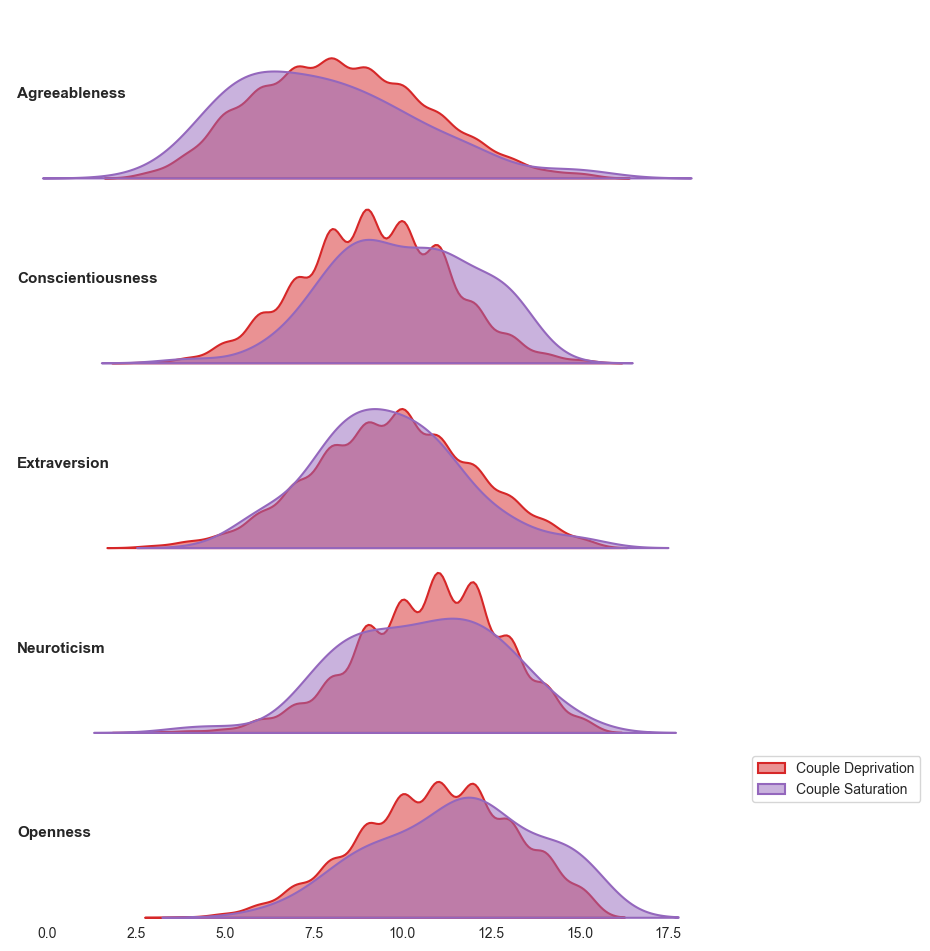

In [10]:
df2 = df_personality[
    (df_personality['SubGroup'] == 'Couple Saturation') |
    (df_personality['SubGroup'] == 'Couple Deprivation')
    ].copy()

df2.sort_values('Trait', ascending=True)

g = sns.FacetGrid(
    data=df2, row="Trait", hue="SubGroup",
    aspect=4, height=2, palette=sns.color_palette()
)
g.map(
    sns.kdeplot, "Score",
    # bw_adjust=0.5,
    clip_on=False, fill=True, alpha=0.5,
    linewidth=1.5
)
g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
g.set_xlabels("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for i, ax in enumerate(g.axes.flatten()):
    labels = ["Agreeableness", "Conscientiousness", "Extraversion", "Neuroticism", "Openness"]
    ax.text(
        0.01, 0.5, labels[i], transform=ax.transAxes,
        fontweight="bold", fontsize=11, ha="left", va="center"
    )
    ax.grid(False)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Conscientiousness_One-sided Saturation vs. Conscientiousness_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:4.936e-01 U_stat=1.662e+06
Neuroticism_Couple Agreement vs. Neuroticism_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:8.994e-12 U_stat=1.052e+06
Extraversion_Couple Agreement vs. Extraversion_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.116e-02 U_stat=1.321e+06
Openness_Couple Agreement vs. Openness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:6.010e-02 U_stat=1.300e+06
Agreeableness_Couple Agreement vs. Agreeableness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.439e-03 U_stat=1.347e+06
Conscientiousness_Couple Agreement vs. Conscientiousness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.121e-02 U_stat=1

[Text(0.5, -52.64360107027056, ''), Text(82.59722222222221, 0.5, 'Rating')]

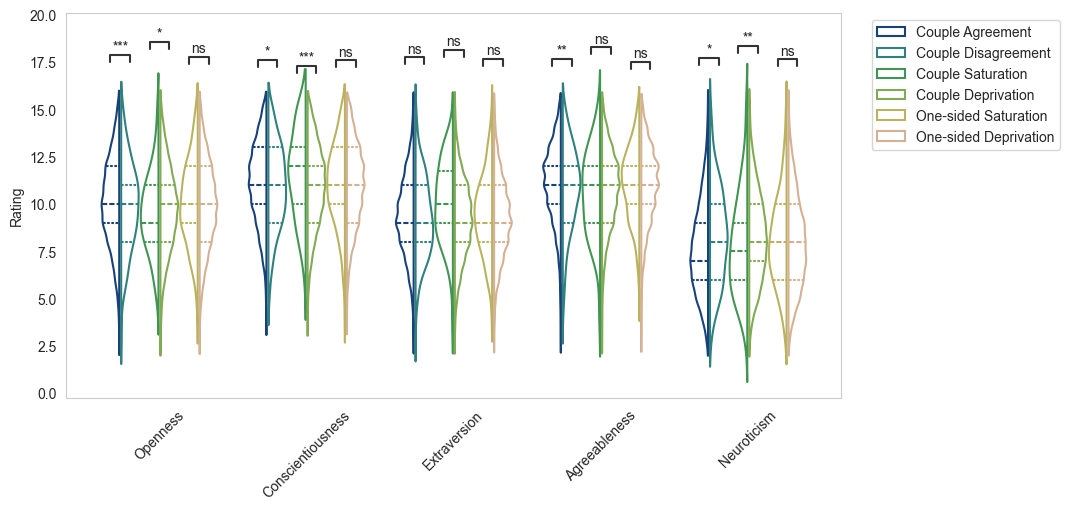

In [11]:
pairs = [
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "Couple Disagreement")),
    (("Extraversion", "Couple Agreement"), ("Extraversion", "Couple Disagreement")),
    (("Openness", "Couple Agreement"), ("Openness", "Couple Disagreement")),
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "Couple Disagreement")),
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "Couple Disagreement")),

    (("Neuroticism", "Couple Saturation"), ("Neuroticism", "Couple Deprivation")),
    (("Extraversion", "Couple Saturation"), ("Extraversion", "Couple Deprivation")),
    (("Openness", "Couple Saturation"), ("Openness", "Couple Deprivation")),
    (("Agreeableness", "Couple Saturation"), ("Agreeableness", "Couple Deprivation")),
    (("Conscientiousness", "Couple Saturation"), ("Conscientiousness", "Couple Deprivation")),

    (("Neuroticism", "One-sided Saturation"), ("Neuroticism", "One-sided Deprivation")),
    (("Extraversion", "One-sided Saturation"), ("Extraversion", "One-sided Deprivation")),
    (("Openness", "One-sided Saturation"), ("Openness", "One-sided Deprivation")),
    (("Agreeableness", "One-sided Saturation"), ("Agreeableness", "One-sided Deprivation")),
    (("Conscientiousness", "One-sided Saturation"), ("Conscientiousness", "One-sided Deprivation")),
]
x_order = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)
plt.xticks(rotation=45)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
#
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")
# plt.savefig('output/img_bg/groups/violin_personality.png', dpi=350, transparent=False, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Openness_Couple Agreement vs. Openness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:6.010e-02 U_stat=1.300e+06
Openness_Couple Agreement vs. Openness_Couple Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:1.045e-02 U_stat=1.985e+05
Openness_Couple Agreement vs. Openness_Couple Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:8.183e-11 U_stat=7.020e+06
Openness_Couple Agreement vs. Openness_One-sided Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:4.084e-01 U_stat=1.282e+06
Openness_Couple Agreement vs. Openness_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:7.909e-04 U_stat=9.754e+06


[Text(0.5, 25.722222222222214, ''), Text(94.22222222222221, 0.5, 'Rating')]

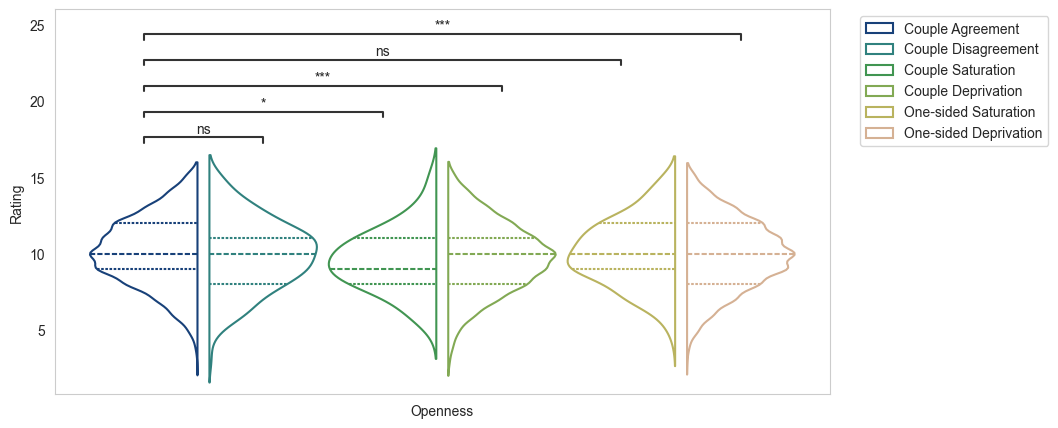

In [12]:
pairs = [
    (("Openness", "Couple Agreement"), ("Openness", "Couple Disagreement")),
    (("Openness", "Couple Agreement"), ("Openness", "Couple Saturation")),
    (("Openness", "Couple Agreement"), ("Openness", "Couple Deprivation")),
    (("Openness", "Couple Agreement"), ("Openness", "One-sided Saturation")),
    (("Openness", "Couple Agreement"), ("Openness", "One-sided Deprivation")),
]
x_order = ["Openness"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order, order=x_order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")
# plt.savefig('output/img_bg/groups/violin_personality.png', dpi=350, transparent=False, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Conscientiousness_Couple Agreement vs. Conscientiousness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.121e-02 U_stat=1.329e+06
Conscientiousness_Couple Agreement vs. Conscientiousness_Couple Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:3.797e-02 U_stat=1.487e+05
Conscientiousness_Couple Agreement vs. Conscientiousness_Couple Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:6.344e-03 U_stat=6.731e+06
Conscientiousness_Couple Agreement vs. Conscientiousness_One-sided Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:6.258e-01 U_stat=1.286e+06
Conscientiousness_Couple Agreement vs. Conscientiousness_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:2.699e-02 U_stat=9.685e+06


[Text(0.5, 25.722222222222214, ''), Text(94.22222222222221, 0.5, 'Rating')]

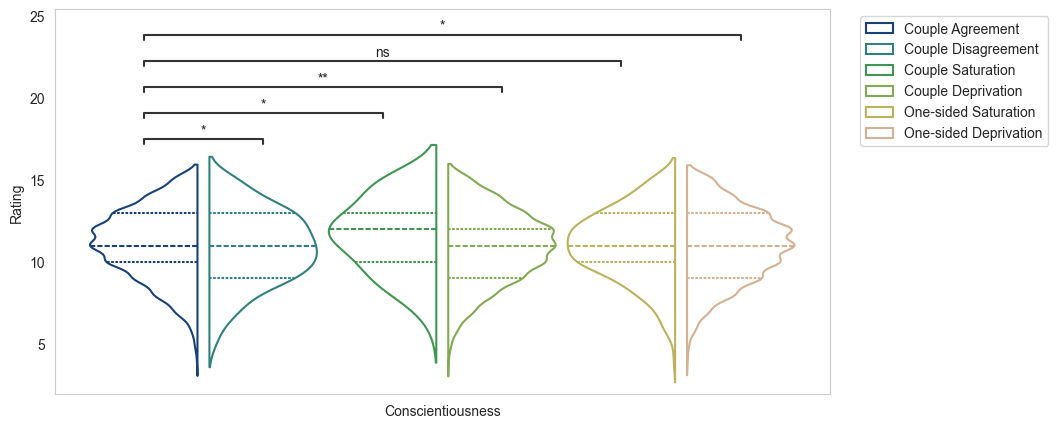

In [13]:
pairs = [
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "Couple Disagreement")),
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "Couple Saturation")),
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "Couple Deprivation")),
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "One-sided Saturation")),
    (("Conscientiousness", "Couple Agreement"), ("Conscientiousness", "One-sided Deprivation")),
]
x_order = ["Conscientiousness"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order, order=x_order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Extraversion_Couple Agreement vs. Extraversion_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.116e-02 U_stat=1.321e+06
Extraversion_Couple Agreement vs. Extraversion_Couple Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:3.926e-03 U_stat=1.420e+05
Extraversion_Couple Agreement vs. Extraversion_Couple Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:7.918e-05 U_stat=6.833e+06
Extraversion_Couple Agreement vs. Extraversion_One-sided Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:6.833e-01 U_stat=1.257e+06
Extraversion_Couple Agreement vs. Extraversion_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:7.108e-03 U_stat=9.741e+06


[Text(0.5, 25.722222222222214, ''), Text(94.22222222222221, 0.5, 'Rating')]

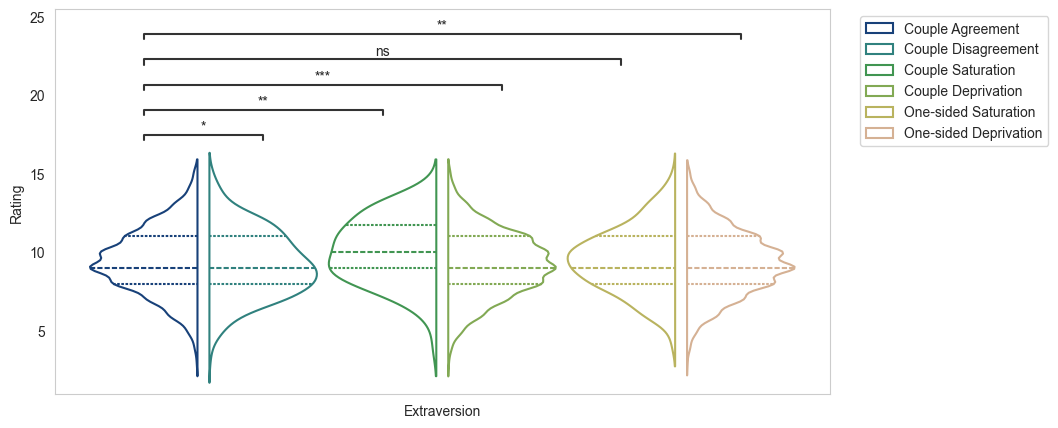

In [14]:
pairs = [
    (("Extraversion", "Couple Agreement"), ("Extraversion", "Couple Disagreement")),
    (("Extraversion", "Couple Agreement"), ("Extraversion", "Couple Saturation")),
    (("Extraversion", "Couple Agreement"), ("Extraversion", "Couple Deprivation")),
    (("Extraversion", "Couple Agreement"), ("Extraversion", "One-sided Saturation")),
    (("Extraversion", "Couple Agreement"), ("Extraversion", "One-sided Deprivation")),
]
x_order = ["Extraversion"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order, order=x_order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Agreeableness_Couple Agreement vs. Agreeableness_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.439e-03 U_stat=1.347e+06
Agreeableness_Couple Agreement vs. Agreeableness_Couple Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:1.236e-02 U_stat=1.986e+05
Agreeableness_Couple Agreement vs. Agreeableness_Couple Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:2.922e-12 U_stat=7.112e+06
Agreeableness_Couple Agreement vs. Agreeableness_One-sided Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:3.567e-01 U_stat=1.296e+06
Agreeableness_Couple Agreement vs. Agreeableness_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:1.105e-03 U_stat=9.815e+06


[Text(0.5, 25.722222222222214, ''), Text(94.22222222222221, 0.5, 'Rating')]

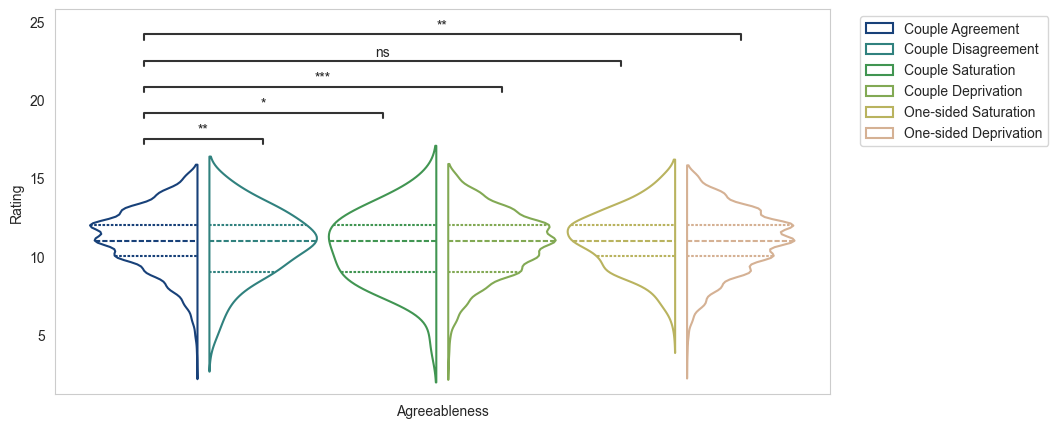

In [15]:
pairs = [
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "Couple Disagreement")),
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "Couple Saturation")),
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "Couple Deprivation")),
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "One-sided Saturation")),
    (("Agreeableness", "Couple Agreement"), ("Agreeableness", "One-sided Deprivation")),
]
x_order = ["Agreeableness"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order, order=x_order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Neuroticism_Couple Agreement vs. Neuroticism_Couple Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:8.994e-12 U_stat=1.052e+06
Neuroticism_Couple Agreement vs. Neuroticism_Couple Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:7.841e-01 U_stat=1.694e+05
Neuroticism_Couple Agreement vs. Neuroticism_Couple Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:1.033e-31 U_stat=5.466e+06
Neuroticism_Couple Agreement vs. Neuroticism_One-sided Saturation: Mann-Whitney-Wilcoxon test two-sided, P_val:1.133e-04 U_stat=1.151e+06
Neuroticism_Couple Agreement vs. Neuroticism_One-sided Deprivation: Mann-Whitney-Wilcoxon test two-sided, P_val:3.800e-12 U_stat=8.626e+06


[Text(0.5, 25.722222222222214, ''), Text(82.59722222222221, 0.5, 'Rating')]

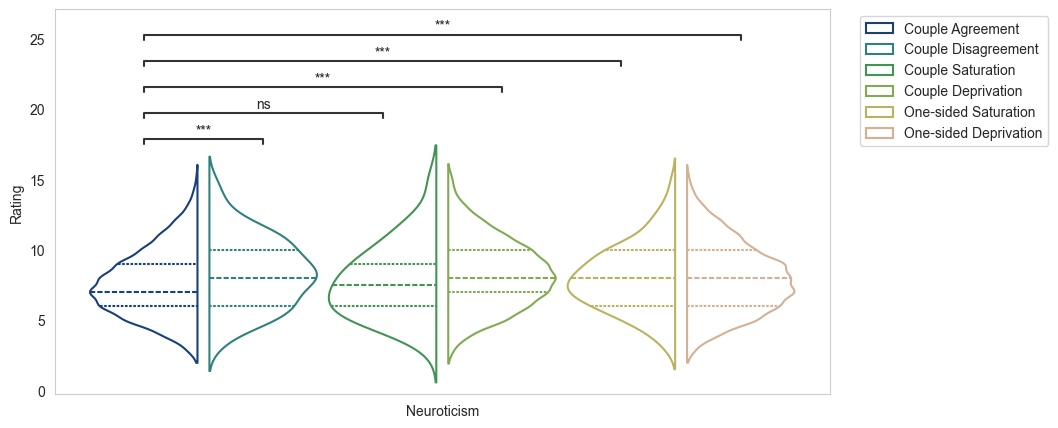

In [16]:
pairs = [
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "Couple Disagreement")),
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "Couple Saturation")),
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "Couple Deprivation")),
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "One-sided Saturation")),
    (("Neuroticism", "Couple Agreement"), ("Neuroticism", "One-sided Deprivation")),
]
x_order = ["Neuroticism"]

plt.figure(figsize=(10, 5))

order = ["Couple Agreement", "Couple Disagreement",
         "Couple Saturation", "Couple Deprivation",
         "One-sided Saturation", "One-sided Deprivation"]

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="SubGroup", hue_order=order, palette=sns.color_palette(palette='gist_earth'),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="SubGroup", hue_order=order, order=x_order,
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="Rating")

In [17]:
traits = ["Partner Agreeableness",
          "Partner Conscientiousness",
          "Partner Extraversion",
          "Partner Neuroticism",
          "Partner Openness"]

results = []
for trait in traits:
    pairs = [
        ((trait, "Couple Agreement"), (trait, "Couple Disagreement")),
        ((trait, "Couple Agreement"), (trait, "Couple Saturation")),
        ((trait, "Couple Agreement"), (trait, "Couple Deprivation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Saturation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Deprivation")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_personality[(df_personality["Role_Trait"] == trait1) &
                                 (df_personality["SubGroup"] == group1)]["Score"].dropna()
        scores2 = df_personality[(df_personality["Role_Trait"] == trait2) &
                                 (df_personality["SubGroup"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Group1": group1,
            "Group2": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    results_df = pd.DataFrame(results)
# print(results_df)

In [18]:
trait_cols = [
    "Anchor Depressiveness", "Partner Depressiveness",
    "Anchor Loneliness", "Partner Loneliness",
    "Anchor Self-esteem", "Partner Self-esteem",
    "Anchor Life Satisfaction", "Partner Life Satisfaction",
    "Anchor Health", "Partner Health",
]

df_wellbeing = df.melt(
    id_vars="SubGroup",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_wellbeing[["Role", "Trait"]] = df_wellbeing["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_wellbeing = (
    df_wellbeing
    .groupby(["Trait", "SubGroup"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [19]:
traits = ["Partner Depressiveness",
          "Partner Loneliness",
          "Partner Self-esteem",
          "Partner Life Satisfaction",
          "Partner Health"]

results = []
for trait in traits:
    pairs = [
        ((trait, "Couple Agreement"), (trait, "Couple Disagreement")),
        ((trait, "Couple Agreement"), (trait, "Couple Saturation")),
        ((trait, "Couple Agreement"), (trait, "Couple Deprivation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Saturation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Deprivation")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_wellbeing[(df_wellbeing["Role_Trait"] == trait1) &
                               (df_wellbeing["SubGroup"] == group1)]["Score"].dropna()
        scores2 = df_wellbeing[(df_wellbeing["Role_Trait"] == trait2) &
                               (df_wellbeing["SubGroup"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Group1": group1,
            "Group2": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    results_df = pd.DataFrame(results)
# print(results_df)

In [20]:
trait_cols = [
    "Anchor Communication Quality", "Partner Communication Quality",
    "Anchor Relationship Satisfaction", "Partner Relationship Satisfaction",
    "Anchor Conflict Management", "Partner Conflict Management"
]

df_communication = df.melt(
    id_vars="SubGroup",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_communication[["Role", "Trait"]] = df_communication["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_communication = (
    df_communication
    .groupby(["Trait", "SubGroup"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [21]:
traits = ["Partner Communication Quality",
          "Partner Relationship Satisfaction",
          "Partner Conflict Management"]

results = []
for trait in traits:
    pairs = [
        ((trait, "Couple Agreement"), (trait, "Couple Disagreement")),
        ((trait, "Couple Agreement"), (trait, "Couple Saturation")),
        ((trait, "Couple Agreement"), (trait, "Couple Deprivation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Saturation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Deprivation")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_communication[(df_communication["Role_Trait"] == trait1) &
                                   (df_communication["SubGroup"] == group1)]["Score"].dropna()
        scores2 = df_communication[(df_communication["Role_Trait"] == trait2) &
                                   (df_communication["SubGroup"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Group1": group1,
            "Group2": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    results_df = pd.DataFrame(results)
# print(results_df)

In [22]:
trait_cols = [
    "Anchor Age", "Partner Age",
    "Anchor Sex", "Partner Sex",
    "Anchor Work Status", "Partner Work Status"
]

df_demographics = df.melt(
    id_vars="SubGroup",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_demographics[["Role", "Trait"]] = df_demographics["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_demographics = (
    df_demographics
    .groupby(["Trait", "SubGroup"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [23]:
traits = ["Partner Age",
          "Partner Sex",
          "Partner Work Status"]

results = []
for trait in traits:
    pairs = [
        ((trait, "Couple Agreement"), (trait, "Couple Disagreement")),
        ((trait, "Couple Agreement"), (trait, "Couple Saturation")),
        ((trait, "Couple Agreement"), (trait, "Couple Deprivation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Saturation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Deprivation")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_demographics[(df_demographics["Role_Trait"] == trait1) &
                                  (df_demographics["SubGroup"] == group1)]["Score"].dropna()
        scores2 = df_demographics[(df_demographics["Role_Trait"] == trait2) &
                                  (df_demographics["SubGroup"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Group1": group1,
            "Group2": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    results_df = pd.DataFrame(results)
# print(results_df)

In [24]:
trait_cols = [
    "Relationship Length",
    "Married",
    "Cohabitation",
    "Kids"
]

df_relationship = df.melt(
    id_vars="SubGroup",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_relationship[["Role", "Trait"]] = df_relationship["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_relationship = (
    df_relationship
    .groupby(["Trait", "SubGroup"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [25]:
traits = [
    "Relationship Length",
    "Married",
    "Cohabitation",
    "Kids"
]

results = []
for trait in traits:
    pairs = [
        ((trait, "Couple Agreement"), (trait, "Couple Disagreement")),
        ((trait, "Couple Agreement"), (trait, "Couple Saturation")),
        ((trait, "Couple Agreement"), (trait, "Couple Deprivation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Saturation")),
        ((trait, "Couple Agreement"), (trait, "One-sided Deprivation")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_relationship[(df_relationship["Role_Trait"] == trait1) &
                                  (df_relationship["SubGroup"] == group1)]["Score"].dropna()
        scores2 = df_relationship[(df_relationship["Role_Trait"] == trait2) &
                                  (df_relationship["SubGroup"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Group1": group1,
            "Group2": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    results_df = pd.DataFrame(results)
# print(results_df)